# Programming Assessment (Python)

## Bud Lab – Fall 18’ Internship




# - Varun kasbekar
## University of Illinois at Urbana Champaign

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn import preprocessing

# Data Preprocessing

I have started with reading individual sensor data files into respective data frames.

In [2]:
ce = pd.read_table('CE.txt', sep = '\t', header = None)
cp = pd.read_table('CP.txt', sep = '\t', header = None)
eps1 = pd.read_table('EPS1.txt', sep = '\t', header = None)
fs1 = pd.read_table('FS1.txt', sep = '\t', header = None)
fs2 = pd.read_table('FS2.txt', sep = '\t', header = None)
ps1 = pd.read_table('PS1.txt', sep = '\t', header = None)
ps2 = pd.read_table('PS2.txt', sep = '\t', header = None)
ps3 = pd.read_table('PS3.txt', sep = '\t', header = None)
ps4 = pd.read_table('PS4.txt', sep = '\t', header = None)
ps5 = pd.read_table('PS5.txt', sep = '\t', header = None)
ps6 = pd.read_table('PS6.txt', sep = '\t', header = None)
se = pd.read_table('SE.txt', sep = '\t', header = None)
ts1 = pd.read_table('TS1.txt', sep = '\t', header = None)
ts2 = pd.read_table('TS2.txt', sep = '\t', header = None)
ts3 = pd.read_table('TS3.txt', sep = '\t', header = None)
ts4 = pd.read_table('TS4.txt', sep = '\t', header = None)
vs1 = pd.read_table('VS1.txt', sep = '\t', header = None)
profile = pd.read_table('profile.txt', sep = '\t', header = None)

# Data Cleaning

## Missing Value Detection
Here I have checked for missing values in each dataframe. I have got negative results indicating that there are no missing values in any of the dataframes. 
I have created a custom fucnction which takes the dataframe as the input and computes or checks for missing values inside it.

In [3]:
def missing_check(table):
    if table.isnull().values.any() == True:
        print('This table has missing values.')
    else:
        print('This table has no missing values.')

In [4]:
missing_check(ce)
missing_check(cp)
missing_check(eps1)
missing_check(fs1)
missing_check(fs2)
missing_check(ps1)
missing_check(ps2)
missing_check(ps3)
missing_check(ps4)
missing_check(ps5)
missing_check(ps6)
missing_check(se)
missing_check(ts1)
missing_check(ts2)
missing_check(ts3)
missing_check(ts4)
missing_check(vs1)

This table has no missing values.
This table has no missing values.
This table has no missing values.
This table has no missing values.
This table has no missing values.
This table has no missing values.
This table has no missing values.
This table has no missing values.
This table has no missing values.
This table has no missing values.
This table has no missing values.
This table has no missing values.
This table has no missing values.
This table has no missing values.
This table has no missing values.
This table has no missing values.
This table has no missing values.


## Visualizing the Data for detecting outliers

Here I am plotting line graphs of every variable. These graphs show the fluctuation of the variable value over time (60, 600 or 6000 time steps depending on the frequency), for 2205 instances (therefore 2205 lines). 

The x-axis represent the time steps, or the number of measurements, and y-axis represents the value of the measurement.

The purpose of this is to see the data and determine whether any individual values seem to be grossly out of range or not conforming to any trend, making them outliers. This also helps to decide what features may be useful in building the classification model.

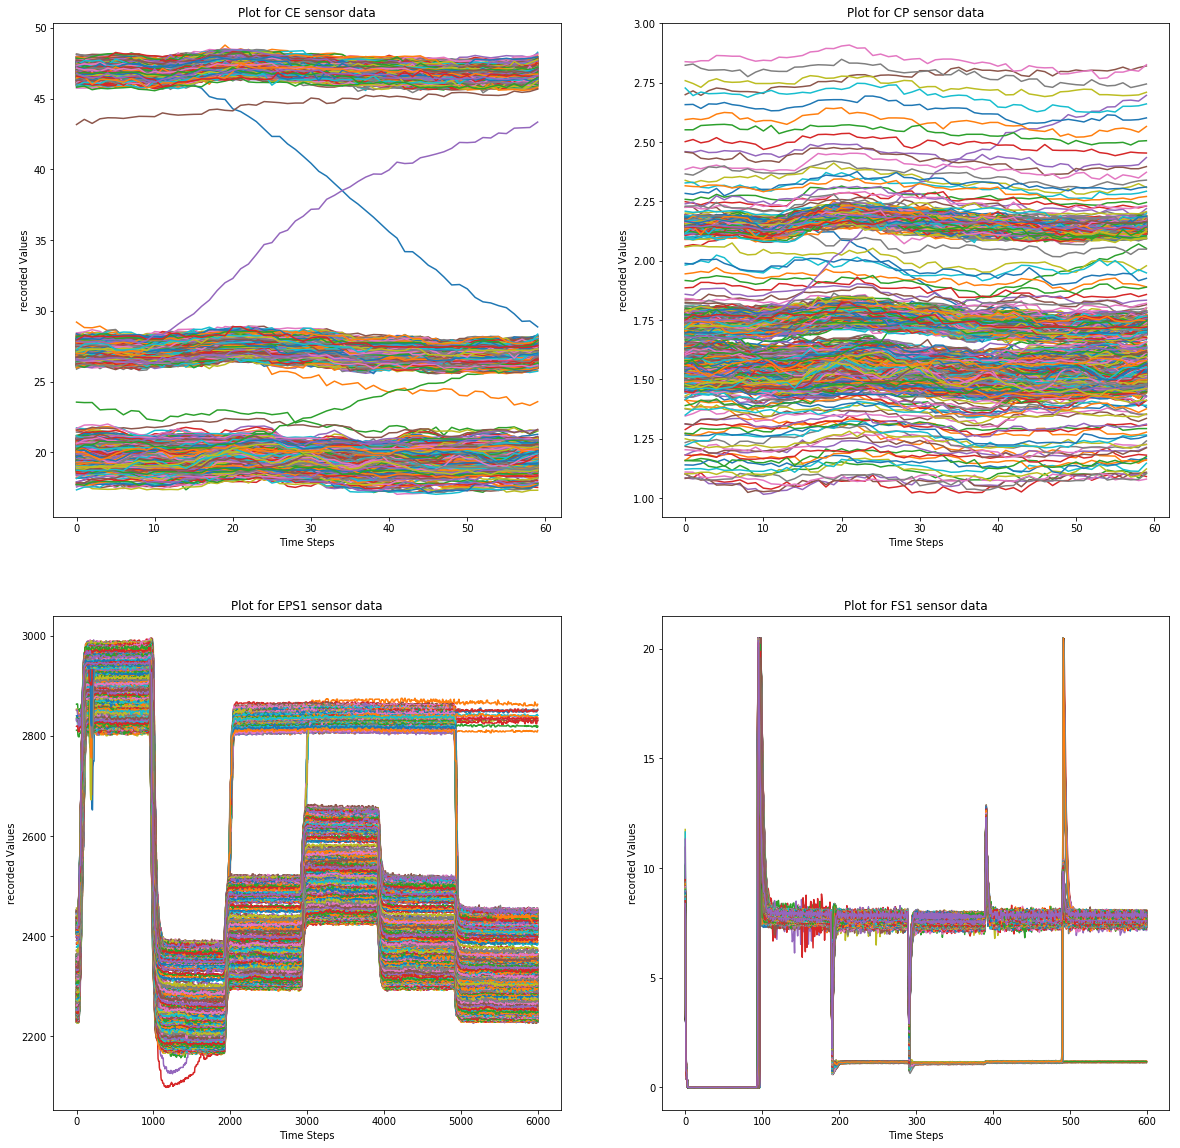

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ce.T.plot(ax=ax1, legend = False)
cp.T.plot(ax=ax2, legend = False)
eps1.T.plot(ax=ax3, legend = False)
fs1.T.plot(ax=ax4, legend = False)

ax1.set_xlabel('Time Steps')
ax1.set_ylabel('recorded Values')
ax1.set_title('Plot for CE sensor data')

ax2.set_xlabel('Time Steps')
ax2.set_ylabel('recorded Values')
ax2.set_title('Plot for CP sensor data')

ax3.set_xlabel('Time Steps')
ax3.set_ylabel('recorded Values')
ax3.set_title('Plot for EPS1 sensor data')

ax4.set_xlabel('Time Steps')
ax4.set_ylabel('recorded Values')
ax4.set_title('Plot for FS1 sensor data')
plt.show()

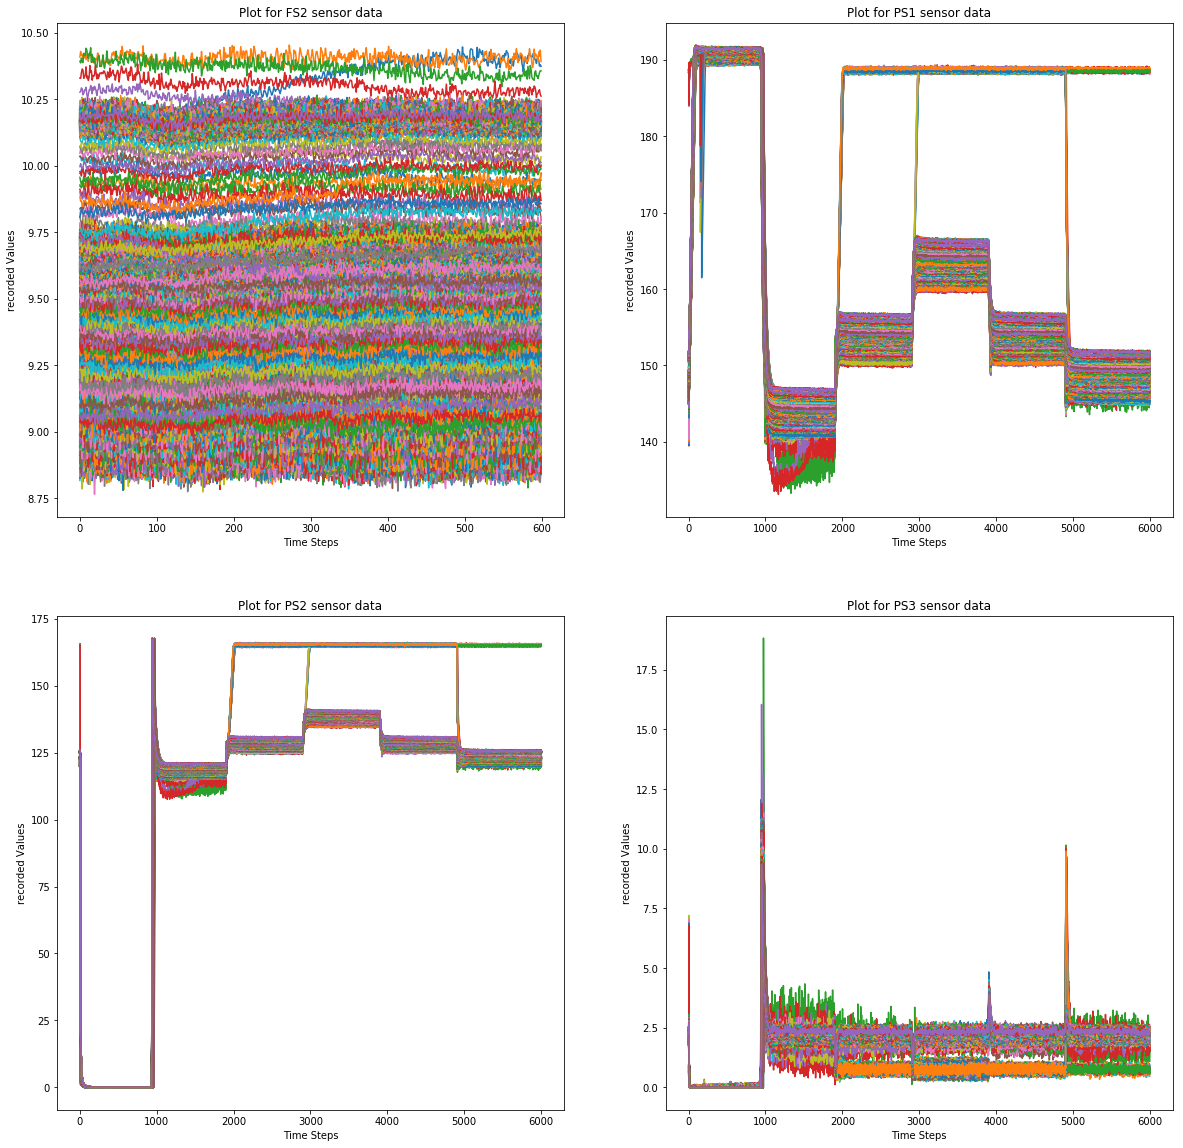

In [6]:
fig = plt.figure(figsize=(20,20))
ax5 = fig.add_subplot(221)
ax6 = fig.add_subplot(222)
ax7 = fig.add_subplot(223)
ax8 = fig.add_subplot(224)

fs2.T.plot(ax=ax5, legend = False)
ps1.T.plot(ax=ax6, legend = False)
ps2.T.plot(ax=ax7, legend = False)
ps3.T.plot(ax=ax8, legend = False)

ax5.set_xlabel('Time Steps')
ax5.set_ylabel('recorded Values')
ax5.set_title('Plot for FS2 sensor data')

ax6.set_xlabel('Time Steps')
ax6.set_ylabel('recorded Values')
ax6.set_title('Plot for PS1 sensor data')

ax7.set_xlabel('Time Steps')
ax7.set_ylabel('recorded Values')
ax7.set_title('Plot for PS2 sensor data')

ax8.set_xlabel('Time Steps')
ax8.set_ylabel('recorded Values')
ax8.set_title('Plot for PS3 sensor data')
plt.show()

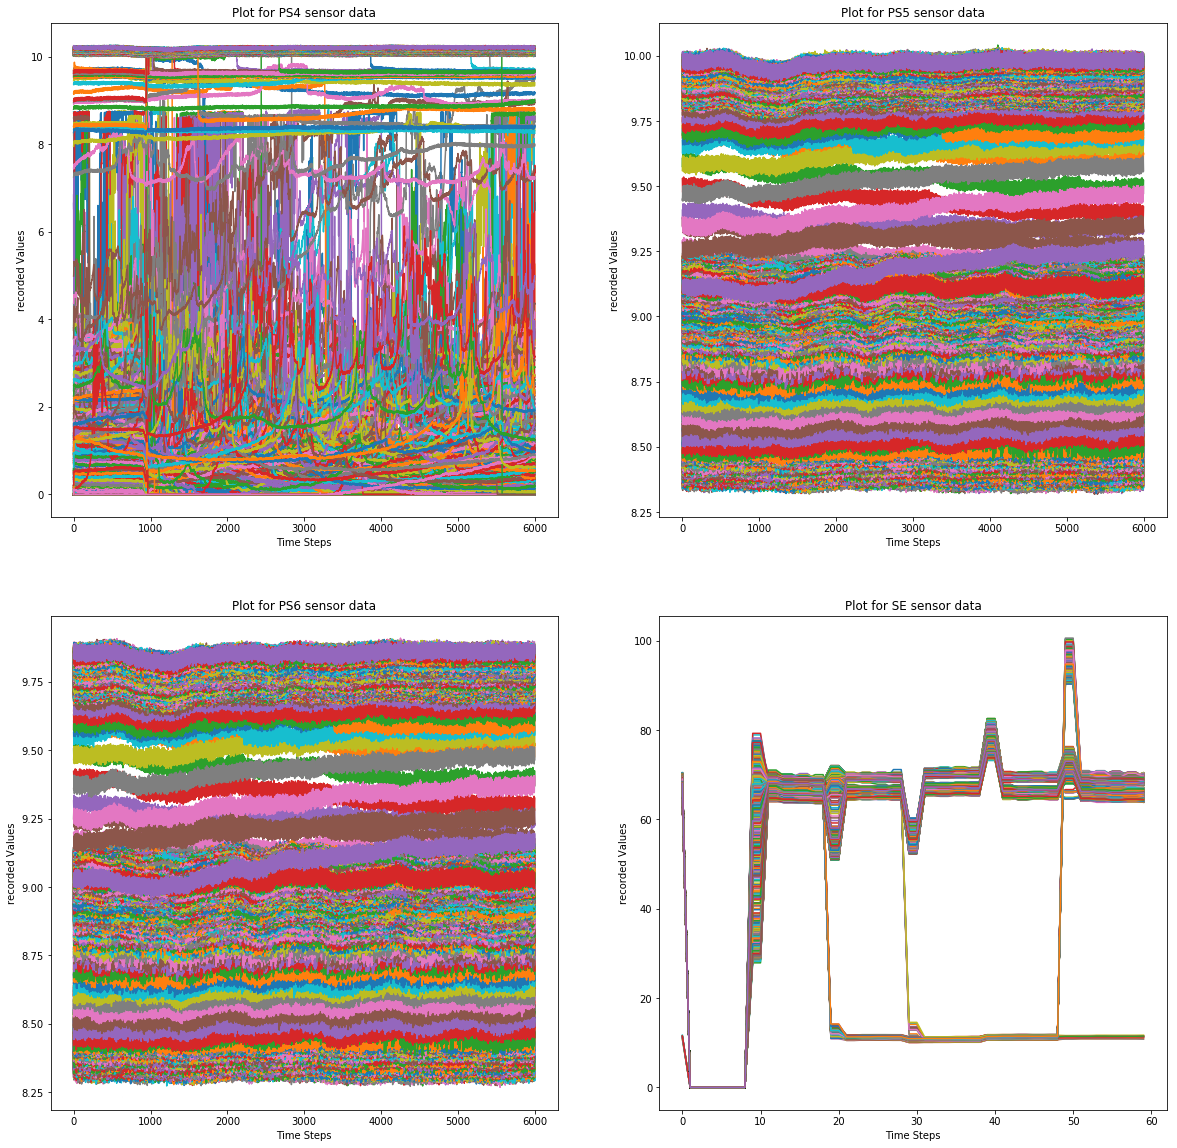

In [7]:
fig = plt.figure(figsize=(20,20))

ax9 = fig.add_subplot(221)
ax10 = fig.add_subplot(222)
ax11 = fig.add_subplot(223)
ax12 = fig.add_subplot(224)

ps4.T.plot(ax=ax9, legend = False)
ps5.T.plot(ax=ax10, legend = False)
ps6.T.plot(ax=ax11, legend = False)
se.T.plot(ax=ax12, legend = False)

ax9.set_xlabel('Time Steps')
ax9.set_ylabel('recorded Values')
ax9.set_title('Plot for PS4 sensor data')

ax10.set_xlabel('Time Steps')
ax10.set_ylabel('recorded Values')
ax10.set_title('Plot for PS5 sensor data')

ax11.set_xlabel('Time Steps')
ax11.set_ylabel('recorded Values')
ax11.set_title('Plot for PS6 sensor data')

ax12.set_xlabel('Time Steps')
ax12.set_ylabel('recorded Values')
ax12.set_title('Plot for SE sensor data')
plt.show()

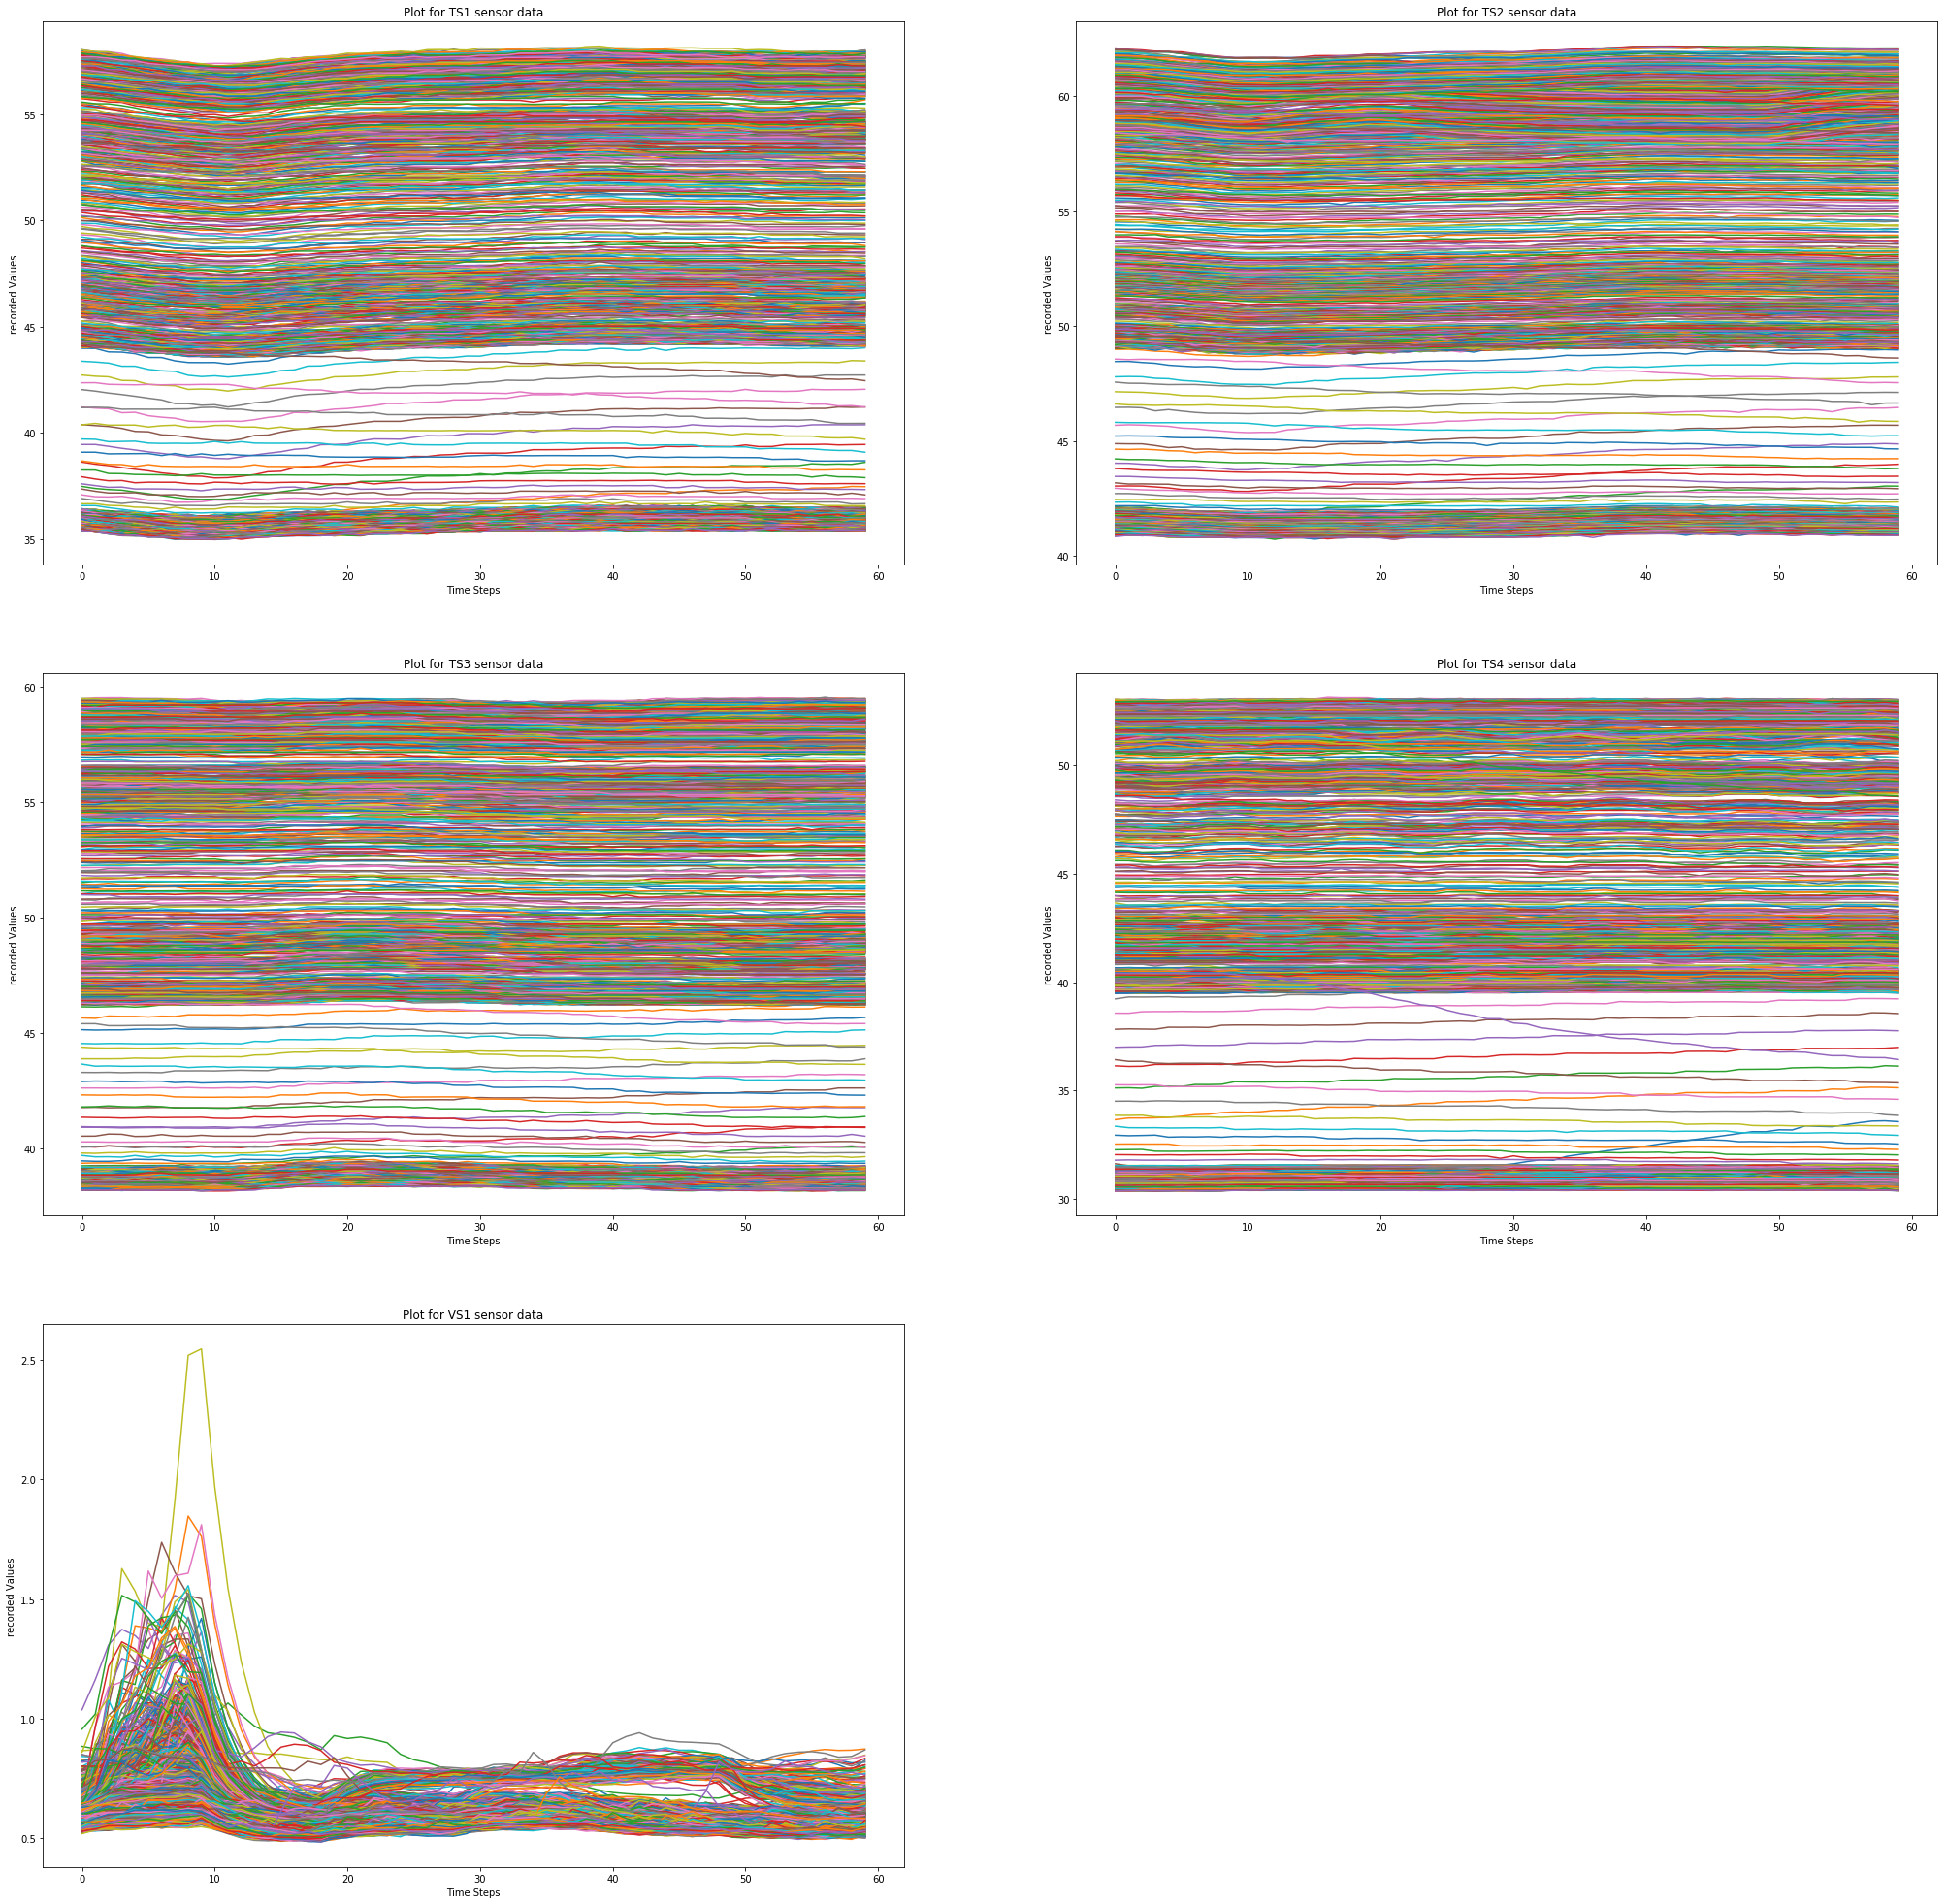

In [8]:
fig = plt.figure(figsize=(35,35))
ax13 = fig.add_subplot(321)
ax14 = fig.add_subplot(322)
ax15 = fig.add_subplot(323)
ax16 = fig.add_subplot(324)
ax17 = fig.add_subplot(325)

ts1.T.plot(ax=ax13, legend = False)
ts2.T.plot(ax=ax14, legend = False)
ts3.T.plot(ax=ax15, legend = False)
ts4.T.plot(ax=ax16, legend = False)
vs1.T.plot(ax=ax17, legend = False)

ax13.set_xlabel('Time Steps')
ax13.set_ylabel('recorded Values')
ax13.set_title('Plot for TS1 sensor data')

ax14.set_xlabel('Time Steps')
ax14.set_ylabel('recorded Values')
ax14.set_title('Plot for TS2 sensor data')

ax15.set_xlabel('Time Steps')
ax15.set_ylabel('recorded Values')
ax15.set_title('Plot for TS3 sensor data')

ax16.set_xlabel('Time Steps')
ax16.set_ylabel('recorded Values')
ax16.set_title('Plot for TS4 sensor data')

ax17.set_xlabel('Time Steps')
ax17.set_ylabel('recorded Values')
ax17.set_title('Plot for VS1 sensor data')
           
plt.show()

# Feature engineering

Now I define a function to calculate the features that I am going to feed into my model. From the visualizations above, it can be seen that the spread and trend of value fluctuations seem to differ and probably have a bearing on the output class. 

I am therefore extracting features that represent this: 

- Standard deviation captures the spread of the data
- Skewness is a measure of the asymmetry of the distribution
- Kurtosis is a measure of whether the data is heavy-tailed or light-tailed with respect to a normal distribution, and captures the frequency of extreme deviations from the center of the distribution

along with mean, median, maximum, minimum and periodicity.

In [9]:
def features(table):
    features = []
    for row in table.iterrows():
        index, data = row
        raw_array = np.asarray(data.tolist())
        mean = np.mean(raw_array)
        median = np.median(raw_array)
        std_dev = np.std(raw_array)
        max_value = np.amax(raw_array)
        min_value = np.amin(raw_array)
        skew_value = skew(raw_array)
        periodicity = len(row)
        kurtosis_value = kurtosis(raw_array)
        feature_vector = np.asarray([mean,median,std_dev,max_value,min_value,skew_value,kurtosis_value, periodicity])
        features.append(feature_vector)
    return np.asarray(features)    

In [10]:
ce_features = features(ce)
cp_features = features(cp)
eps1_features = features(eps1)
fs1_features = features(fs1)
fs2_features = features(fs2)
ps1_features = features(ps1)
ps2_features = features(ps2)
ps3_features = features(ps3)
ps4_features = features(ps4)
ps5_features = features(ps5)
ps6_features = features(ps6)
se_features = features(se)
ts1_features = features(ts1)
ts2_features = features(ts2)
ts3_features = features(ts3)
ts4_features = features(ts4)
vs1_features = features(vs1)

## Aggregating extracted feature data

Here I am combining the features extracted from all the different variables into one feature matrix, by stacking them horizontally.

In [11]:
x = np.hstack((ce_features,cp_features,eps1_features,fs1_features,fs2_features,ps1_features,ps2_features,ps3_features,ps4_features,ps5_features,ps6_features,se_features,ts1_features,ts2_features,ts3_features,ts4_features,vs1_features))

## Data Dimensionality

Here I am checking the data dimensionality. 

It has 2205 rows, representing 2205 instances or samples. It has 136 columns, representing 17x8 features, as there are 8 features for each of the 17 training variables.

In [13]:
x.shape

(2205, 136)

Here I am extracting the variable I am trying to predict, i.e. hydraulic accumulator pressure.

In [14]:
y = profile[3]

# Train-test split

Here I am splitting my feature and class data into train and test samples, so that I have a held-out test set for evaluation. I am specifying a random state for reproducibility of results, and will be doing so for all my classifiers.

I will be splitting the data 80/20 into train and test, as there is a good amount of data (2000~ samples), but not too much or too little.

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

Here I am standardizing the feature data for both train and test samples. Many machine learning algorithms assume that the input data is standardized, i.e. of 0 mean and unit variance.

In [16]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Training and testing

I will be using the following three classification algorithms in my analysis:

- Support Vector Machine
- Random Forest Classifer
- Gradient Boosted Machine

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import GridSearchCV
import seaborn as sn

# Support Vector Machine

The Support Vector Machine is a fast classifier that maps training examples into a vector space, such that the examples of the separate categories are divided by a gap that is as wide as possible - the computational complexity is relatively low as compared to other classifiers, but it can still perform quite efficiently, especially with parameter tuning and cross-validation. It tends to perform better than classifiers like Random Forests with limited data, but in the presence of adequate data, Random Forests and Gradient Boosted Trees outperform SVMs.

For the purpose of this analysis, I will be starting with a basic linear Support Vector Machine classifier as it is, in order to obtain a baseline against which to compare my other results.

I am calculating the output metrics of accuracy, precision, recall and F1 score and plotting a confusion matrix to see how the classifier performed.

In [84]:
classifier = svm.LinearSVC(random_state = 2)

In [85]:
classifier.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=2, tol=0.0001,
     verbose=0)

In [86]:
predicted_classes = classifier.predict(x_test)

In [87]:
p,r,f,s = precision_recall_fscore_support(y_test,predicted_classes, average = 'weighted')
a = accuracy_score(y_test,predicted_classes)
print('Accuracy:', round(a,3))
print('Precision:',round(p,3))
print('Recall:',round(r,3))
print('F1 score:',round(f,3))

Accuracy: 0.533
Precision: 0.534
Recall: 0.533
F1 score: 0.51


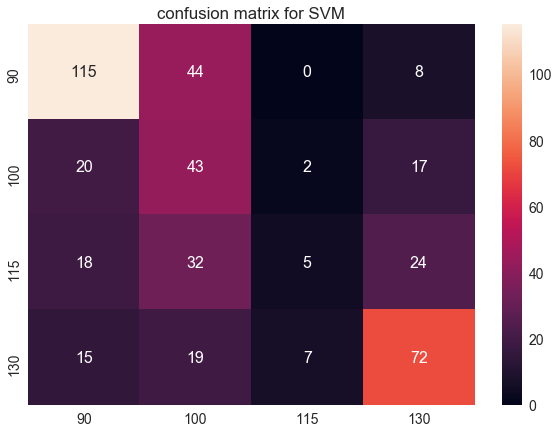

In [88]:
array = confusion_matrix(y_test,list(predicted_classes))     
df_cm = pd.DataFrame(array, [90,100,115,130],[90,100,115,130])
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')#font size
plt.title("confusion matrix for SVM")
plt.show()


# Random Forest Classifier

The random forest algorithm is highly scalable to any number of dimensions. It is an improvement on regular decision trees and it constructs multiple trees through random sampling, and then outputs the mode of the classes of the individual trees, therefore not running the risk of overfitting, which is common in decision trees that get too complex. The randdomness helps to make the model more robust. It is generally seen to be very effective.

In order to determine the best combination of parameters, I am using Grid Search along with Cross-Validation with a predefined parameter grid in order to find the best model.

In [71]:
classifier1 = RandomForestClassifier(random_state = 2)

In [78]:
parameters = { "n_estimators" : [20, 30, 50, 80, 120, 150, 170, 190],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}
gridsearch = GridSearchCV(classifier1, parameters)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 30, 50, 80, 120, 150, 170, 190], 'max_depth': [1, 5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
gridsearch.best_params_

{'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 120}

In [80]:
predicted_classes1 = gridsearch.predict(x_test)

In [81]:
p1,r1,f1,s1 = precision_recall_fscore_support(y_test,predicted_classes1, average = 'weighted')
a1 = accuracy_score(y_test,predicted_classes1)
print('Accuracy:', round(a1,3))
print('Precision:',round(p1,3))
print('Recall:',round(r1,3))
print('F1 score:',round(f1,3))

Accuracy: 0.991
Precision: 0.991
Recall: 0.991
F1 score: 0.991


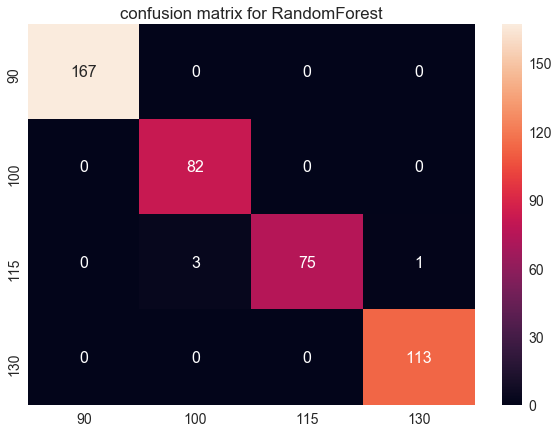

In [82]:
array = confusion_matrix(y_test,list(predicted_classes1))     
df_cm = pd.DataFrame(array, [90,100,115,130],[90,100,115,130])
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')#font size
plt.title("confusion matrix for RandomForest")
plt.show()

# Gradient Boosting Classifier

Gradient Boosting is often effective when a large amount of training data is available. In this method Gradient Boosted Trees are built sequentially, with each new tree helping to correct errors made by previously trained trees, and misclassified instances being given higher priority in training. Benchmark results tend to show that Gradient Boosted Trees perform better than Random Forest classifiers.

In [73]:
classifier2 = GradientBoostingClassifier(random_state = 2)

In [74]:
classifier2.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)

In [75]:
predicted_classes2 = classifier2.predict(x_test)

In [1]:
p2,r2,f2,s2 = precision_recall_fscore_support(y_test,predicted_classes2, average = 'weighted')
a2 = accuracy_score(y_test,predicted_classes2)
print('Accuracy:', round(a2,3))
print('Precision:',round(p2,3))
print('Recall:',round(r2,3))
print('F1 score:',round(f2,3))
print(classification_report(y_test, predicted_classes2))

NameError: name 'precision_recall_fscore_support' is not defined

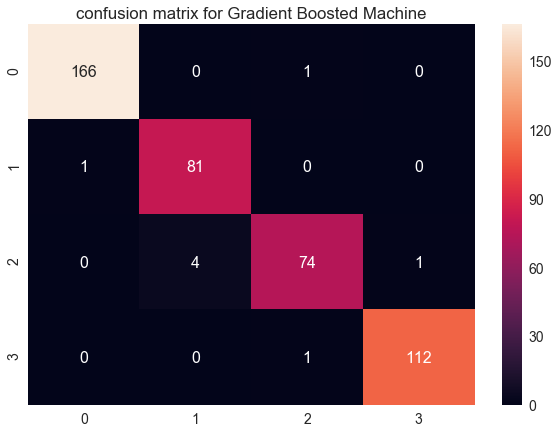

In [77]:
array = confusion_matrix(y_test,list(predicted_classes2))     
df_cm = pd.DataFrame(array, range(4),range(4))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')#font size
plt.title("confusion matrix for Gradient Boosted Machine")
plt.show()

# Result Comparison

The linear Support Vector Machine classifier gave an accuracy of 53.3% and an F1 score of 51.0%. 

The tuned Random Forest model gave the best results, with an accuracy of 99.1% and F1 score of 99.1%. 

The Gradient Boosting classifier performed almost as well as the Random Forest model, with accuracy of 98.2% and F1 score of 98.2%.


In [35]:
results=pd.DataFrame([[a,p,r,f],[a1,p1,r1,f1],[a2,p2,r2,f2]], index = ['SupportVectorMachine','RandomForest','GradientBoosting'],columns = ['Accuracy','Precision','Recall','F1 score'])

In [36]:
results

Accuracy  Precision    Recall  F1 score
SupportVectorMachine  0.532880   0.533606  0.532880  0.509624
RandomForest          0.990930   0.991190  0.990930  0.990878
GradientBoosting      0.981859   0.982007  0.981859  0.981802

## Results Visualization

I am storing all the precision, recall, f1 score and accuracy values for all the three classification algorithms in a results dataframe. 

I am finally plotting the results dataframe using barplot to visualize these values in a more descriptive manner.

It is clearly evident that SVM does not perform well enough for our data whereas random Forests perform the best and Gradient Boosting also performs equally well.

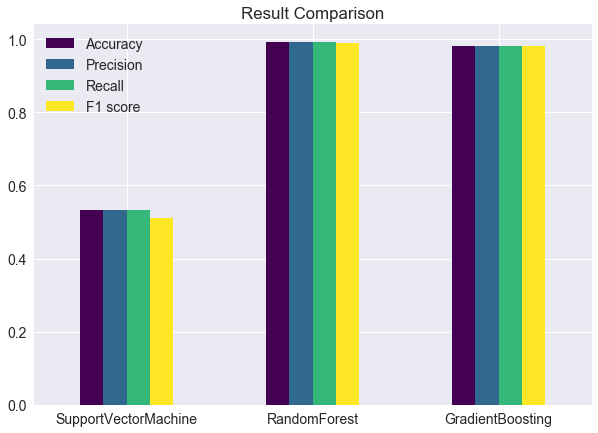

In [37]:
results.plot(kind='bar', figsize=(10,7), colormap="viridis")
plt.title("Result Comparison")
plt.xticks(rotation=0)
plt.show()

# Recommendation for SVC using Scaled Data

After the train-test split, I scaled the train and test feature data and stored it. A common recommendation made to improve performance on a Support Vector Machine is to use normalized feature vectors, in order to ensure that larger magnitude values of one variable do not dominate another. GBM and RF do not require this as they are tree classification algorithms that attempt to partition and rank features, rather than assigning coefficients or weights. 

When using scaled features, the performance of the SVC is significantly higher, with accuracy and F1 score of 0.941, although it is still slightly lower than GBM and RF.

In [89]:
classifier = svm.LinearSVC(random_state = 2)

In [90]:
classifier.fit(x_scaled,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=2, tol=0.0001,
     verbose=0)

In [91]:
predicted_classes = classifier.predict(x_test_scaled)

In [92]:
p,r,f,s = precision_recall_fscore_support(y_test,predicted_classes, average = 'weighted')
a = accuracy_score(y_test,predicted_classes)
print('Accuracy:', round(a,3))
print('Precision:',round(p,3))
print('Recall:',round(r,3))
print('F1 score:',round(f,3))

Accuracy: 0.941
Precision: 0.942
Recall: 0.941
F1 score: 0.941


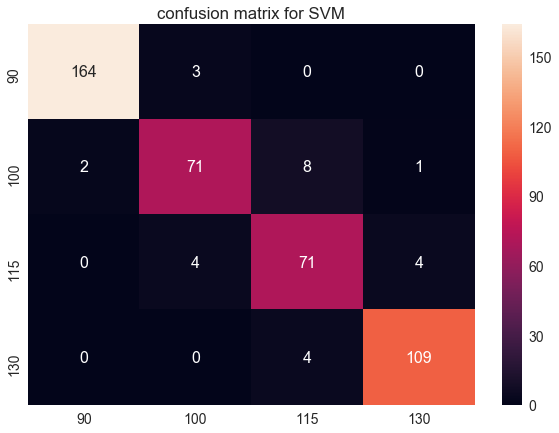

In [93]:
array = confusion_matrix(y_test,list(predicted_classes))     
df_cm = pd.DataFrame(array, [90,100,115,130],[90,100,115,130])
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')#font size
plt.title("confusion matrix for SVM")
plt.show()

## Improved results

In [97]:
improved_results=pd.DataFrame([[a,p,r,f],[a1,p1,r1,f1],[a2,p2,r2,f2]], index = ['SupportVectorMachine','RandomForest','GradientBoosting'],columns = ['Accuracy','Precision','Recall','F1 score'])
improved_results

Accuracy  Precision    Recall  F1 score
SupportVectorMachine  0.941043   0.941613  0.941043  0.941121
RandomForest          0.990930   0.991190  0.990930  0.990878
GradientBoosting      0.981859   0.982001  0.981859  0.981808

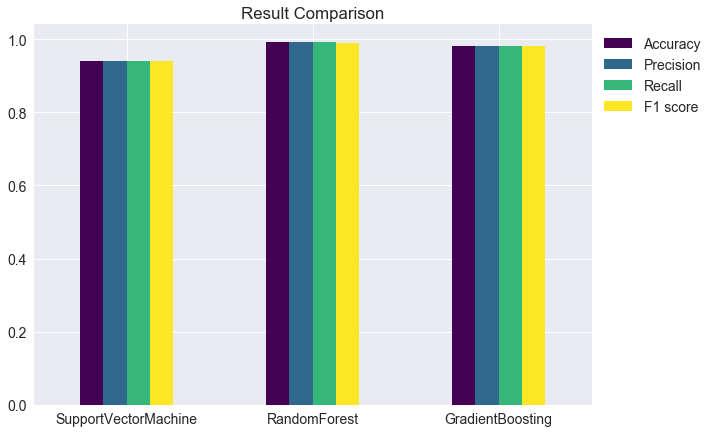

In [110]:
improved_results.plot(kind='bar', figsize=(10,7), colormap="viridis")
plt.legend(loc = 'best', bbox_to_anchor=(1,1))
plt.title("Result Comparison")
plt.xticks(rotation=0)
plt.show()